<a href="https://colab.research.google.com/github/SteenaR/machine_learning-Project/blob/main/TelecomCustomerChurn(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TELECOM CUSTOMER CHURN PREDICTION USING ANN**


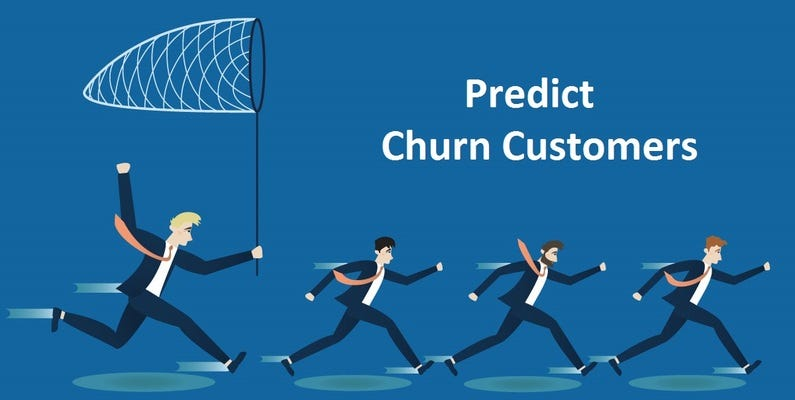

**Importing Libraries**

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [232]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [233]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [234]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**Number Of Rows And Columns**

In [235]:
df.shape

(7043, 21)

**Column Names**

In [236]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Information Of The Dataset**

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Statistical Description**

In [238]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [239]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Converting String-Like Representation Of A Number To A Numeric Type**

In [240]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

**Checking DataType**

In [241]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Checking Missing Value And Handling it**

In [242]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [243]:
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].mean())

**Dropping Unnecessary Column**

In [244]:
 df.drop(['customerID'], axis=1, inplace=True)

**Listing Categorigal And Numerical Values**

In [245]:
categorigal_val = []
numerical_val = []
for column in df.columns:
  if df[column].dtype == object:
    categorigal_val.append(df[column])
  else:
    numerical_val.append(df[column])

**Count Of Each String Values**

In [246]:
for i in categorigal_val:
    print(i.value_counts())
    print('-'*50)

gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
--------------------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
--------------------------------------------------
OnlineBackup
No                     3088
Yes            

**Explorative Data Analysis**

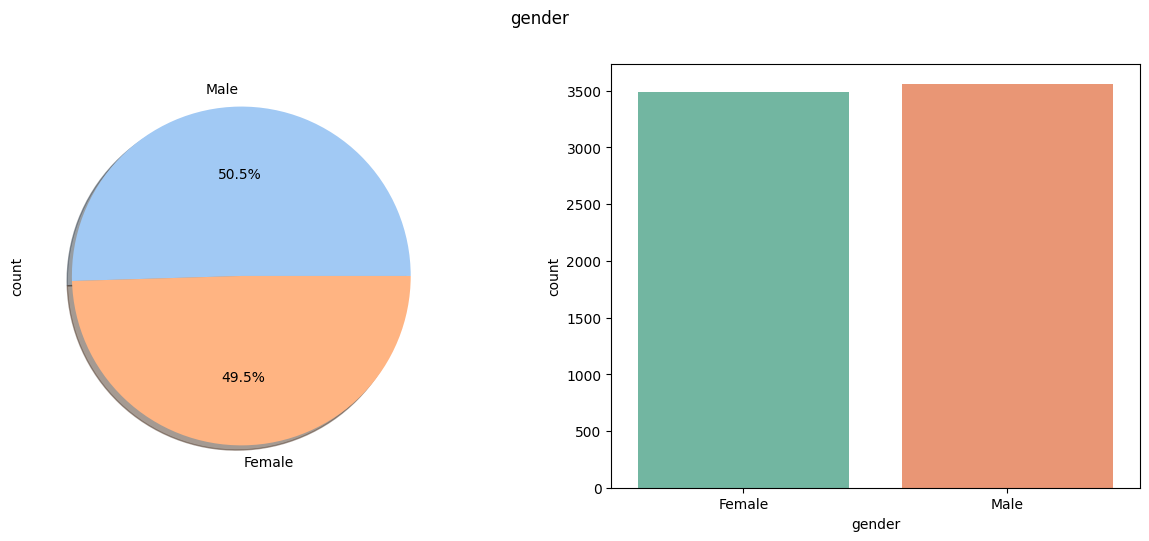

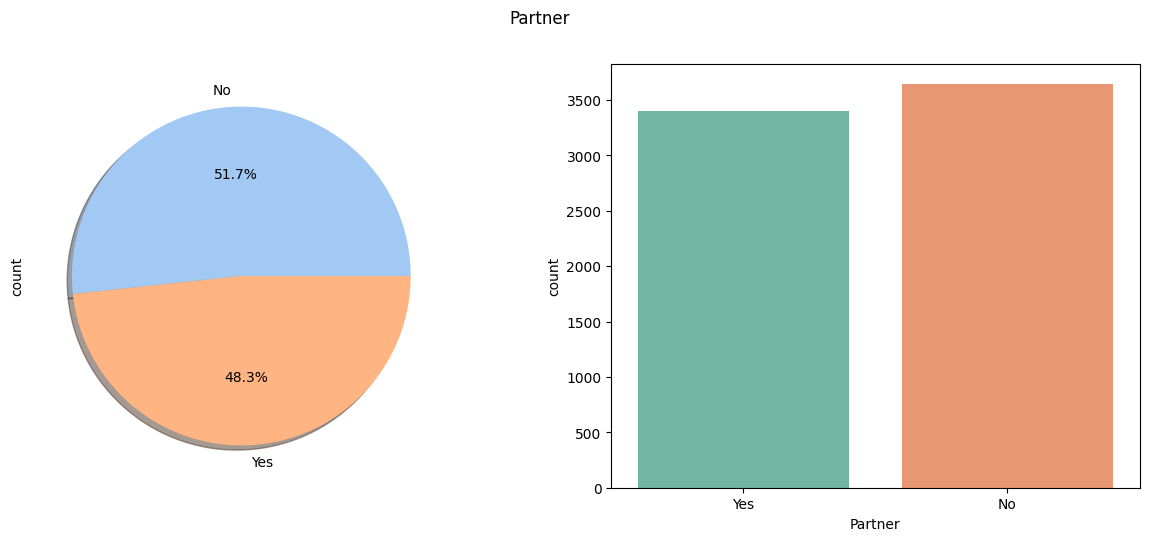

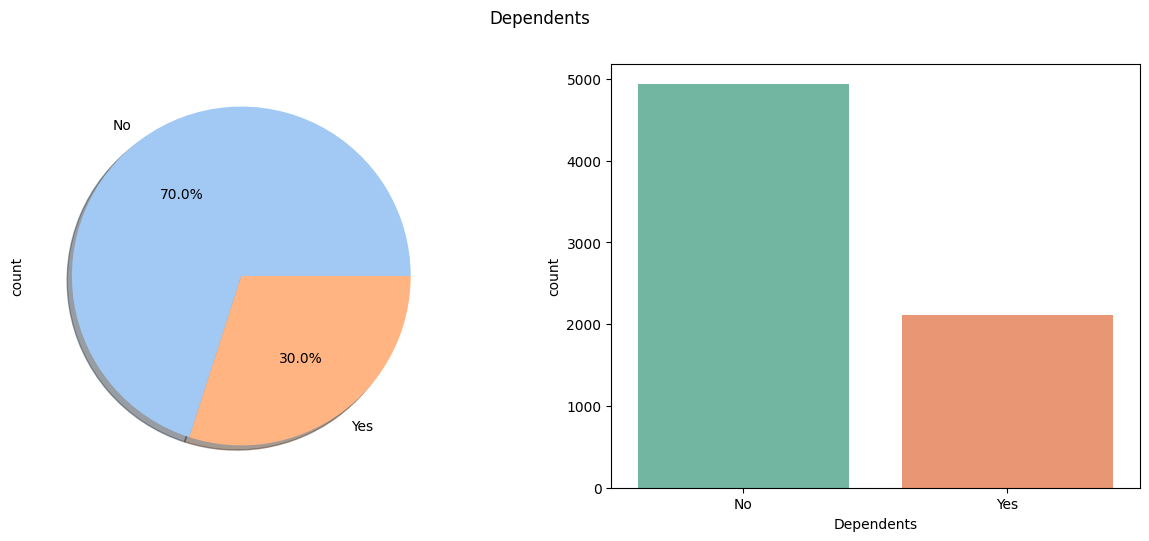

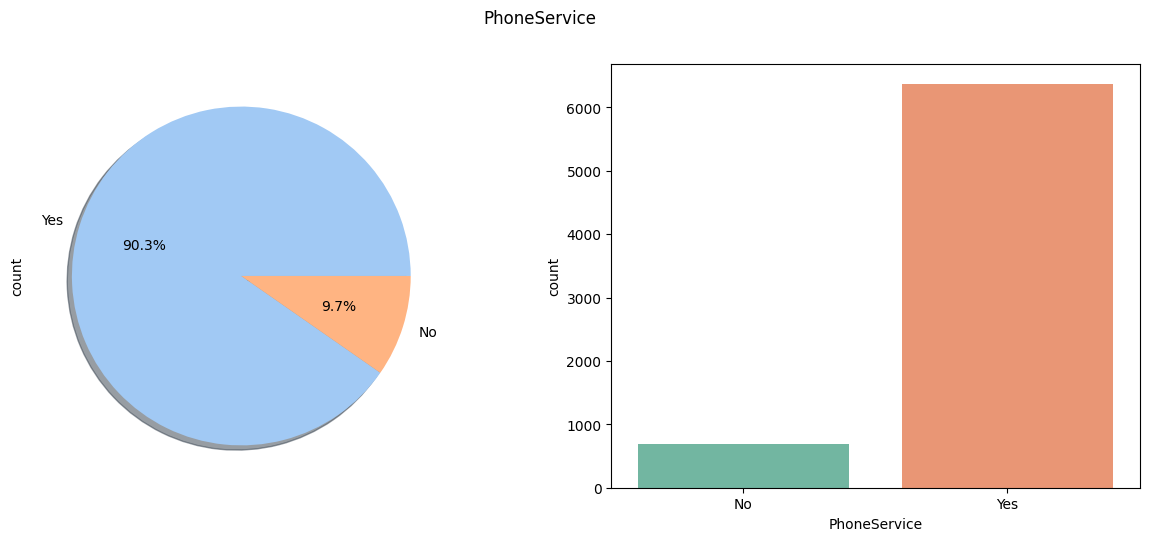

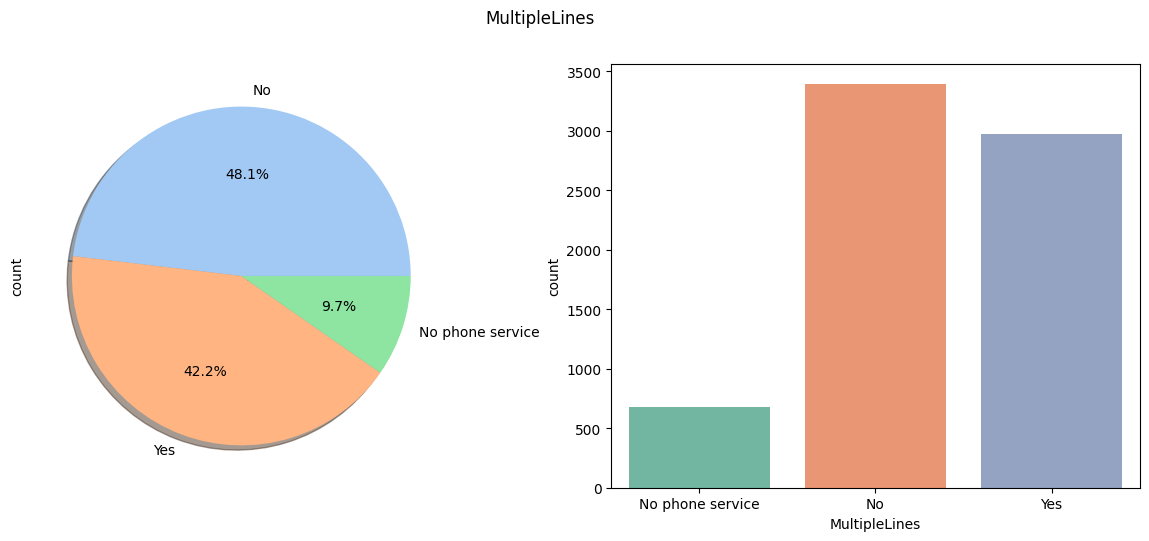

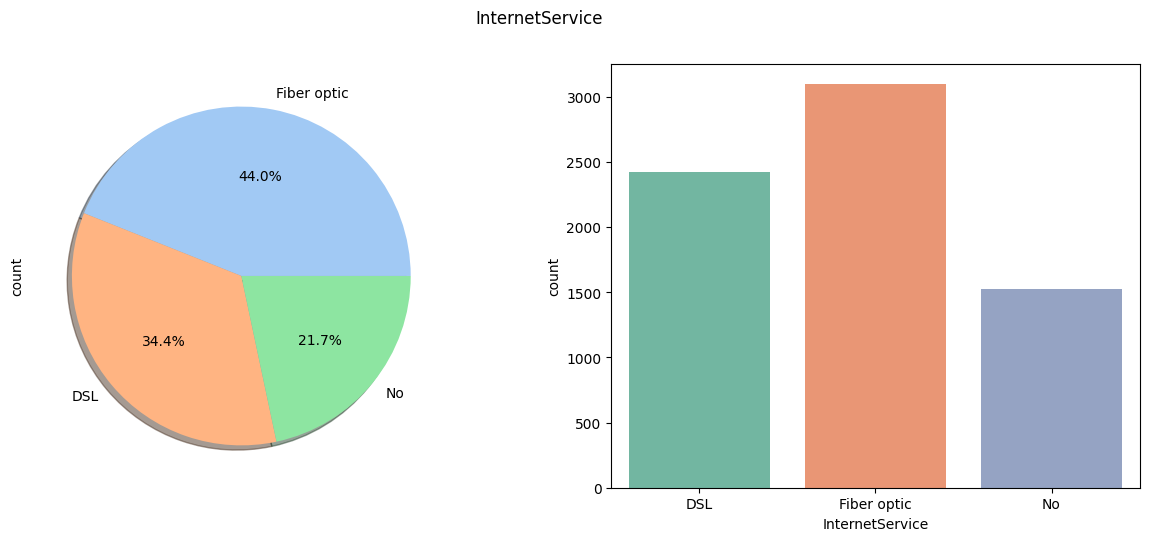

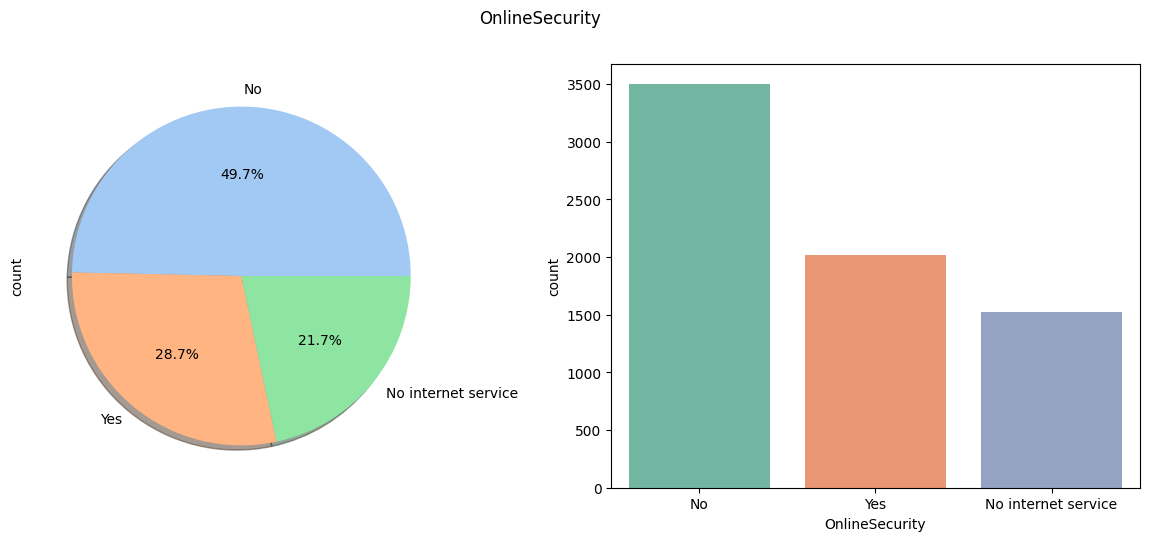

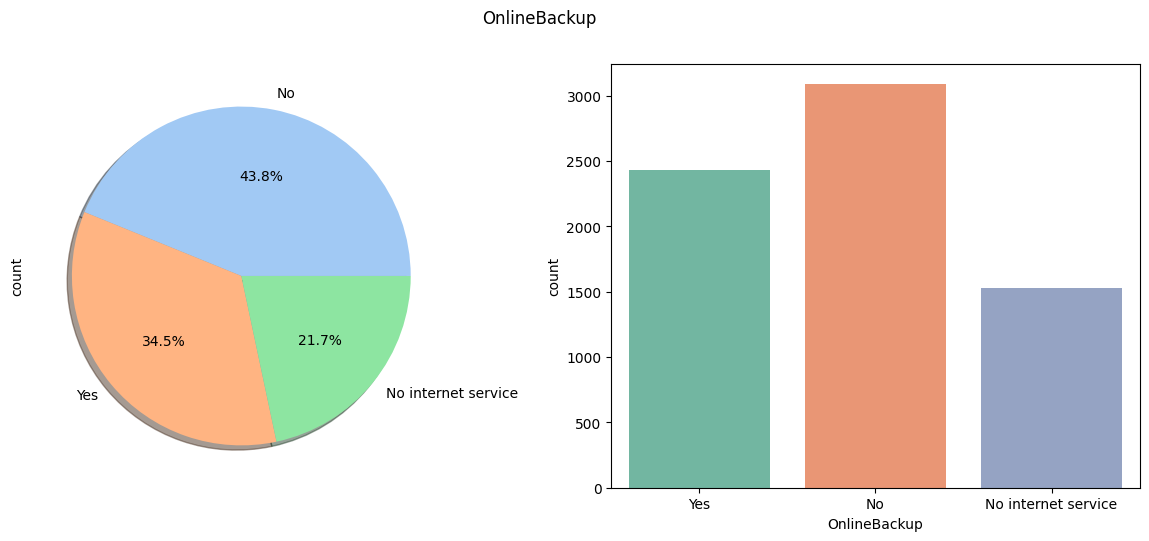

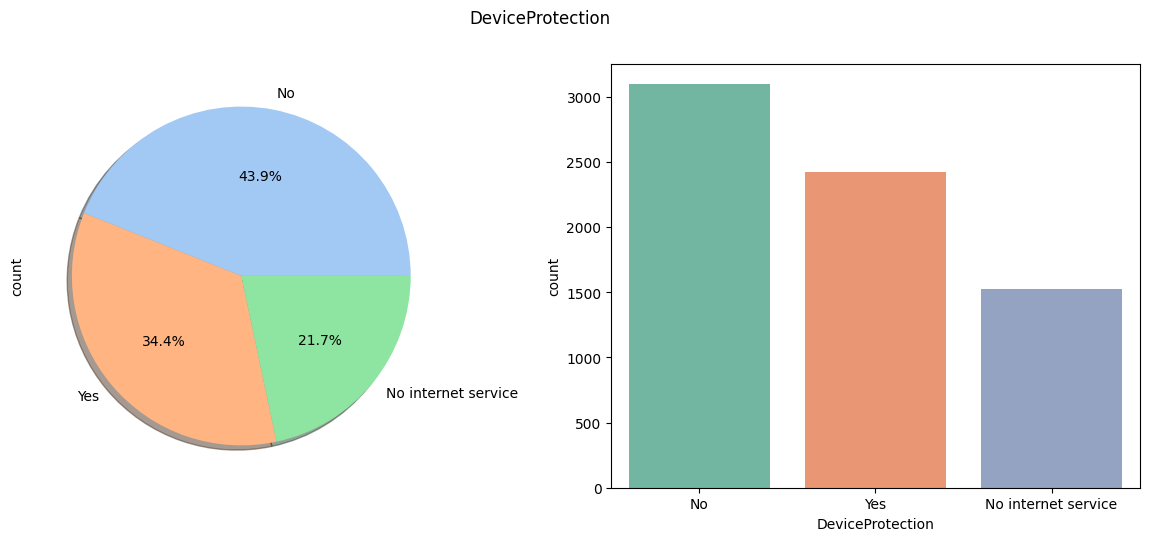

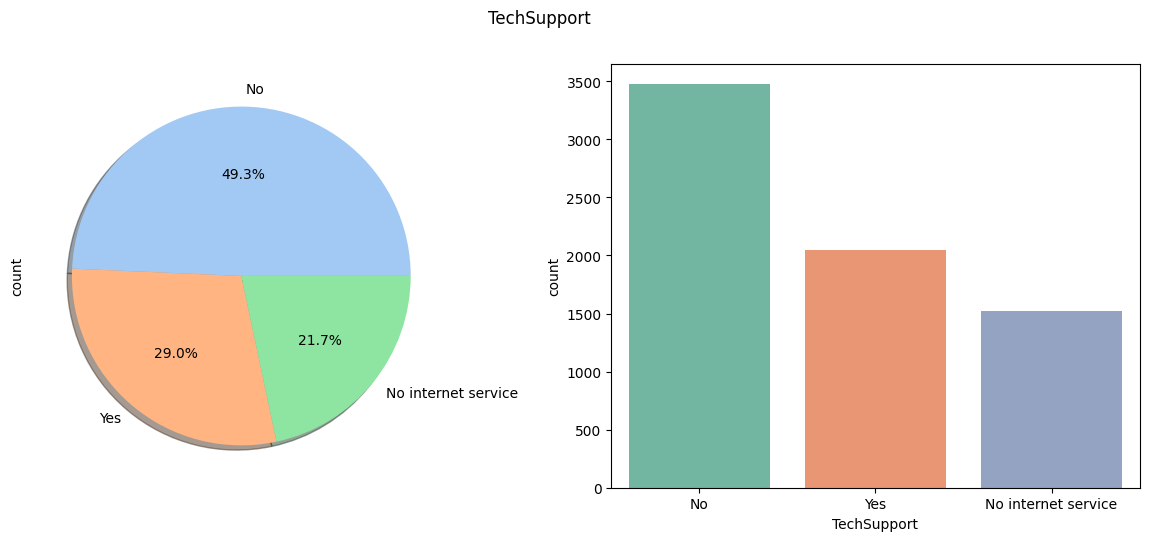

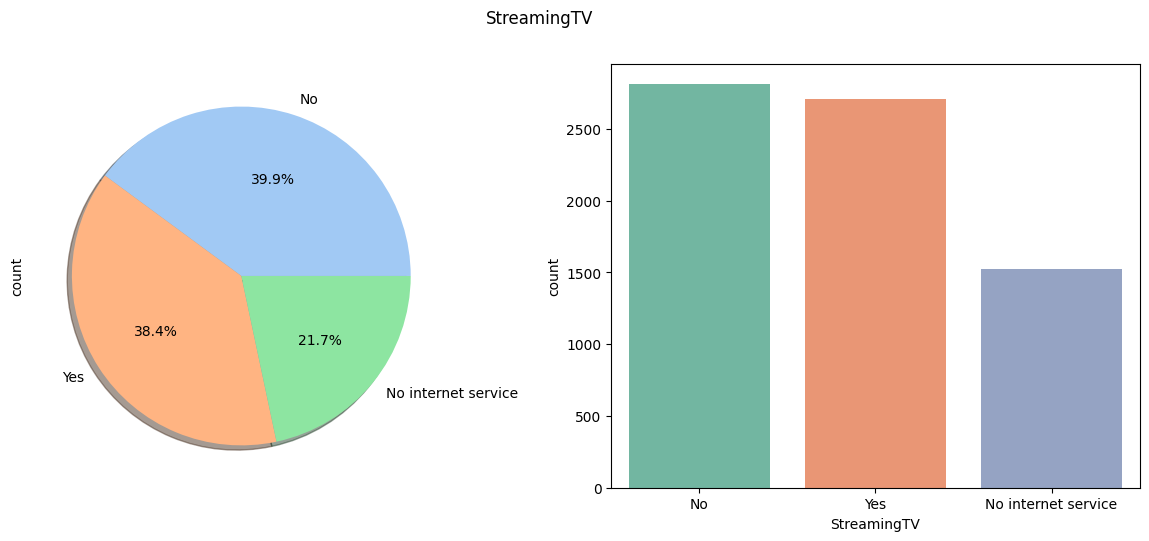

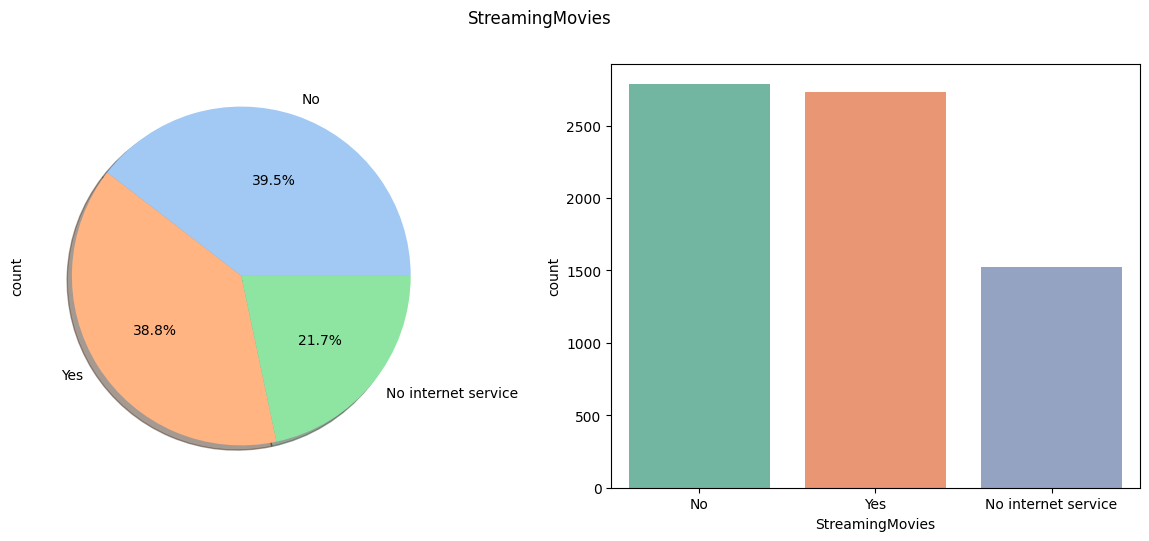

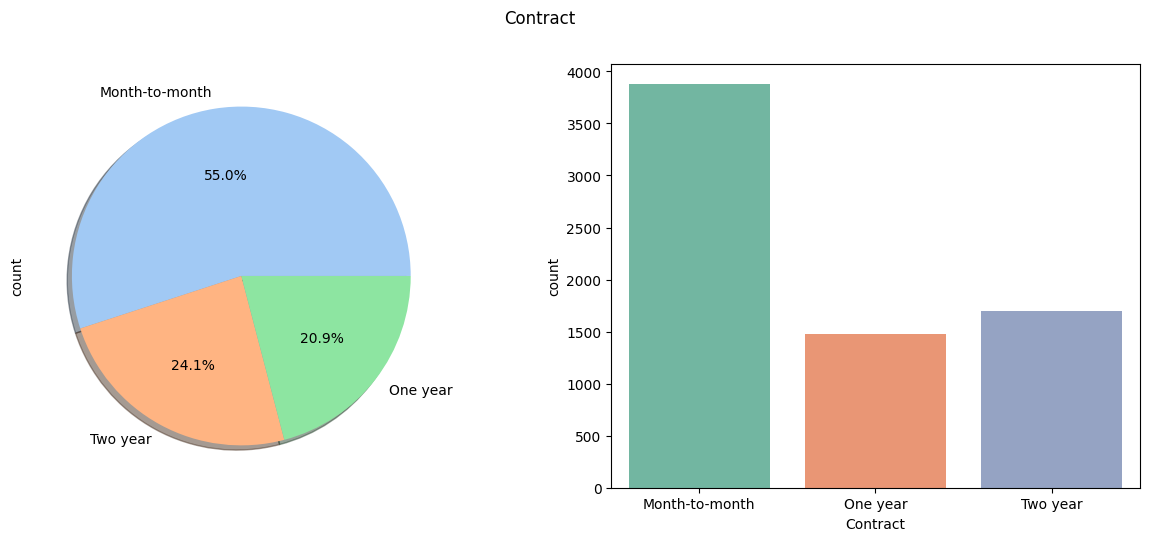

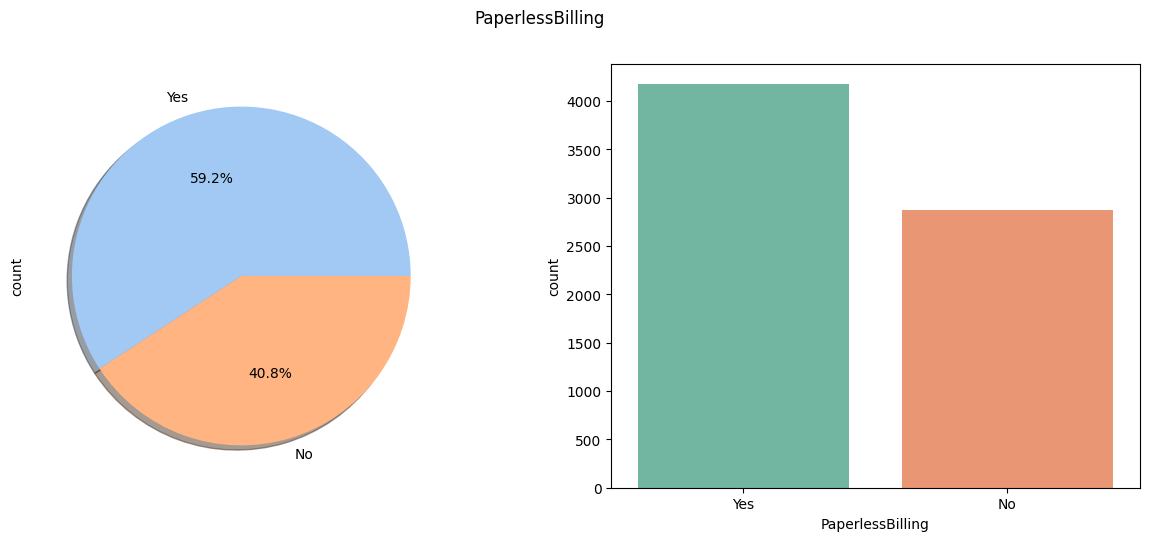

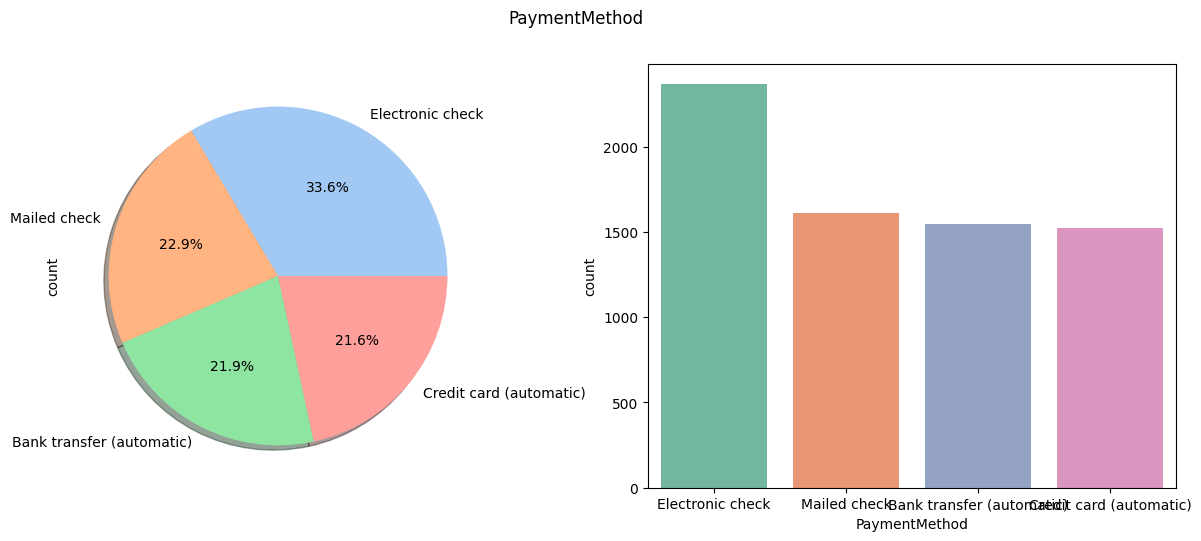

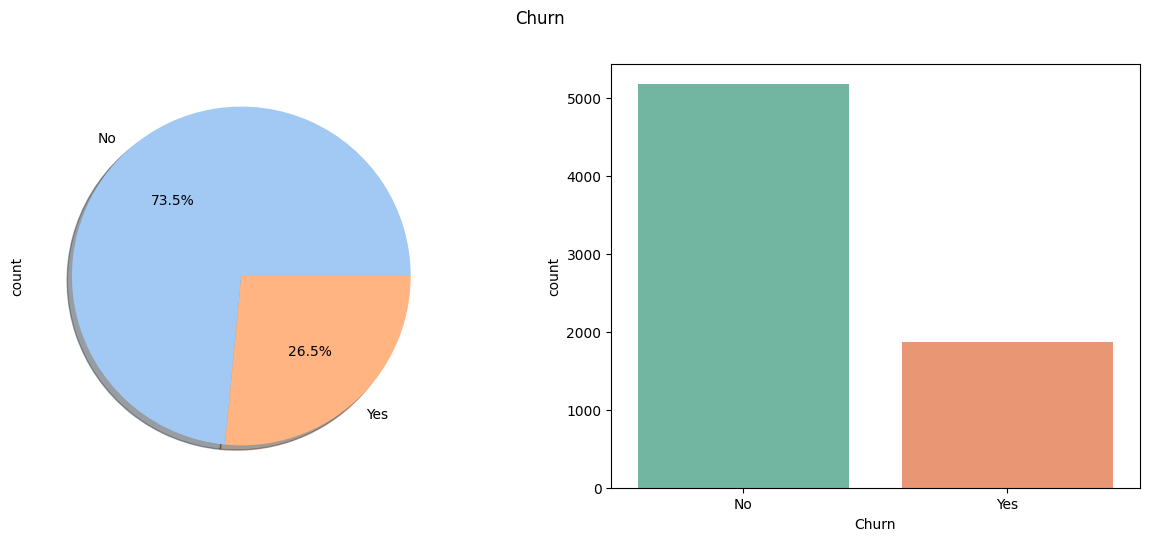

In [247]:
for i in categorigal_val:
  f,ax = plt.subplots(1,2,figsize=(15,5.5))
  i.value_counts().plot.pie(autopct= '%1.1f%%',
                            ax= ax[0],
                            shadow= True,
                            colors = sns.color_palette('pastel'))

  sns.countplot(x= i,
                data= df,
                ax= ax[1],
                legend= False,
                hue= i,
                palette= 'Set2')

  plt.suptitle(i.name)
  plt.show()

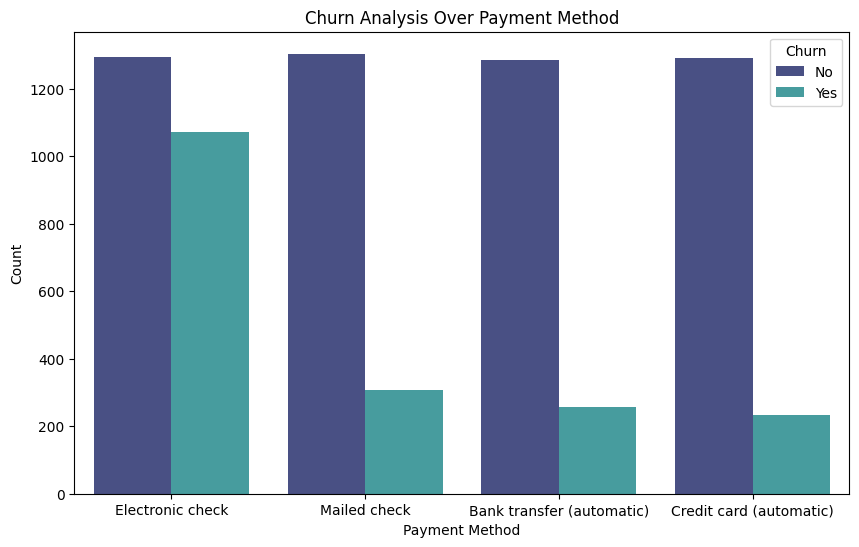

In [248]:
plt.subplots(figsize=(10,6))
sns.countplot(x= 'PaymentMethod',
              data= df,
              hue= 'Churn',
              palette= 'mako')

plt.title('Churn Analysis Over Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

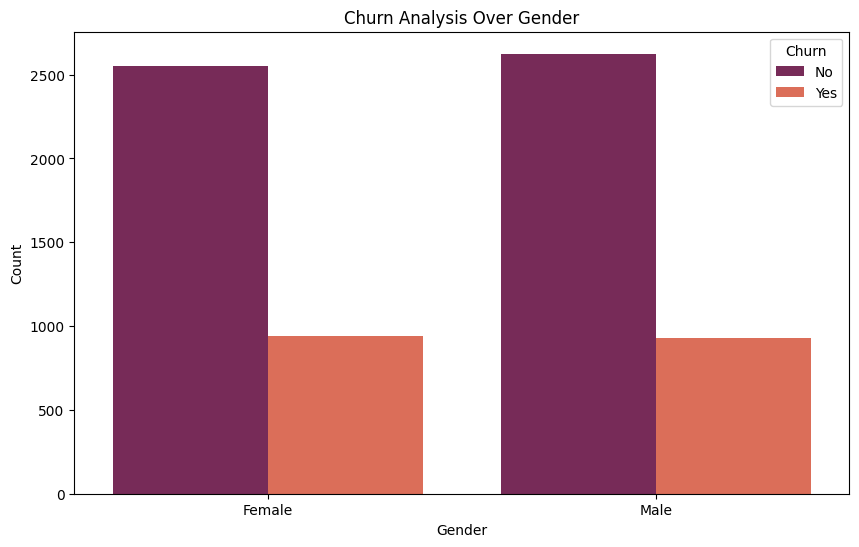

In [249]:
plt.subplots(figsize=(10,6))
sns.countplot(x= 'gender',
              data= df,
              hue= 'Churn',
              palette= 'rocket')

plt.title('Churn Analysis Over Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

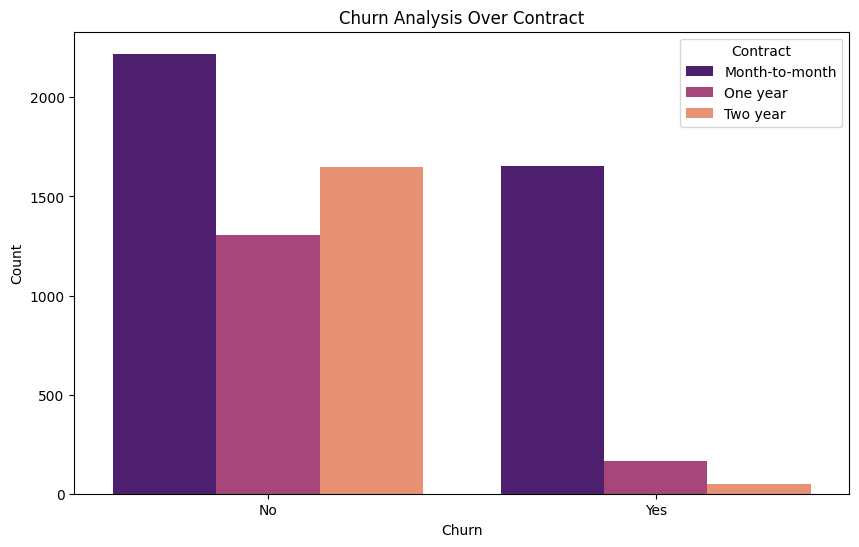

In [250]:
plt.subplots(figsize=(10,6))
sns.countplot(x= 'Churn',
              data= df,
              hue= 'Contract',
              palette= 'magma')

plt.title('Churn Analysis Over Contract')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

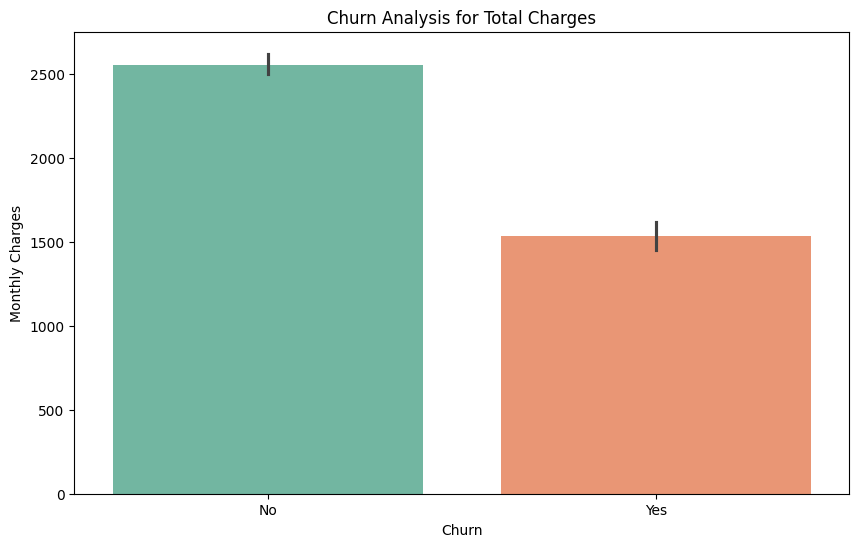

In [251]:
plt.subplots(figsize=(10,6))
sns.barplot(x= 'Churn',
            y= 'TotalCharges',
            data= df,
            palette= 'Set2',
            )

plt.title('Churn Analysis for Total Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

In [252]:
px.scatter(df,
           x= 'tenure',
           y= 'MonthlyCharges',
           color= 'Churn',
           title= 'Churn Analysis: Tenure vs Monthly Charges',
           trendline= 'ols',
           trendline_color_override= 'black')

In [253]:
px.scatter(df,
           x= 'TotalCharges',
           y= 'MonthlyCharges',
           color= 'Churn',
           title= 'Churn Analysis: Total Charges vsMonthly Charges')

In [254]:
fig = px.pie(df,
       values= 'MonthlyCharges',
       names= 'Churn',
       title= 'churn vs monthly chargers',
       color_discrete_sequence= px.colors.sequential.RdBu)

fig.update_traces(textposition='inside',
                  textinfo='percent+label')

In [255]:
px.pie(df,
       values= 'SeniorCitizen',
       names= 'gender',
       hole= 0.5,
       title= 'Gender analysis of Senior Citizen',
       color_discrete_sequence= [ '#d8576b','#ed7953']
       )


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

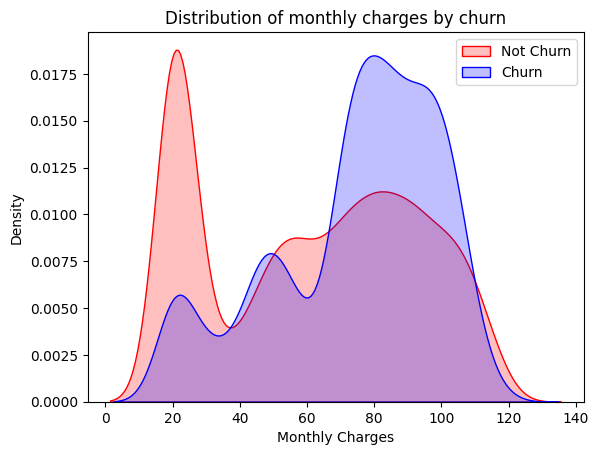

In [256]:
fig = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                  color= "Red",
                  shade= True)

fig = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                  ax= fig,
                  color= "Blue",
                  shade= True)

fig.legend(["Not Churn","Churn"],loc= 'upper right')
fig.set_ylabel('Density')
fig.set_xlabel('Monthly Charges')
fig.set_title('Distribution of monthly charges by churn')


Text(0.5, 1.0, 'Distribution of total charges by churn')

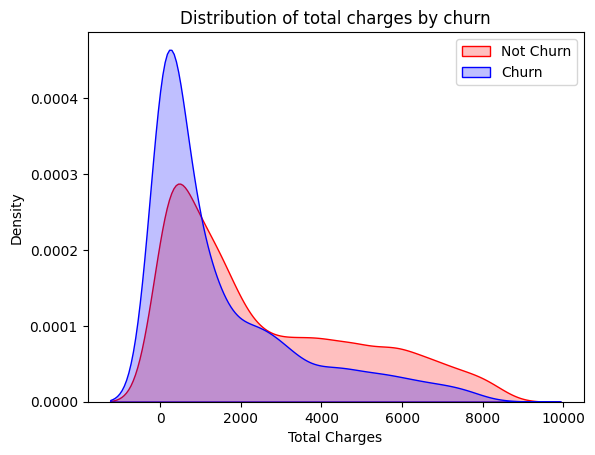

In [257]:
fig = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                  color="Red",
                  shade = True)

fig = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                  ax= fig,
                  color= "Blue",
                  shade= True)

fig.legend(["Not Churn","Churn"],loc= 'upper right')
fig.set_ylabel('Density')
fig.set_xlabel('Total Charges')
fig.set_title('Distribution of total charges by churn')

**Encoding Object Values**

In [258]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in df.columns:
  if df[i].dtype == object:
    df[i] = encoder.fit_transform(df[i])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Checking Any Outliers Present In The Dataset**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'gender'),
  Text(1, 0, 'SeniorCitizen'),
  Text(2, 0, 'Partner'),
  Text(3, 0, 'Dependents'),
  Text(4, 0, 'tenure'),
  Text(5, 0, 'PhoneService'),
  Text(6, 0, 'MultipleLines'),
  Text(7, 0, 'InternetService'),
  Text(8, 0, 'OnlineSecurity'),
  Text(9, 0, 'OnlineBackup'),
  Text(10, 0, 'DeviceProtection'),
  Text(11, 0, 'TechSupport'),
  Text(12, 0, 'StreamingTV'),
  Text(13, 0, 'StreamingMovies'),
  Text(14, 0, 'Contract'),
  Text(15, 0, 'PaperlessBilling'),
  Text(16, 0, 'PaymentMethod'),
  Text(17, 0, 'MonthlyCharges'),
  Text(18, 0, 'TotalCharges'),
  Text(19, 0, 'Churn')])

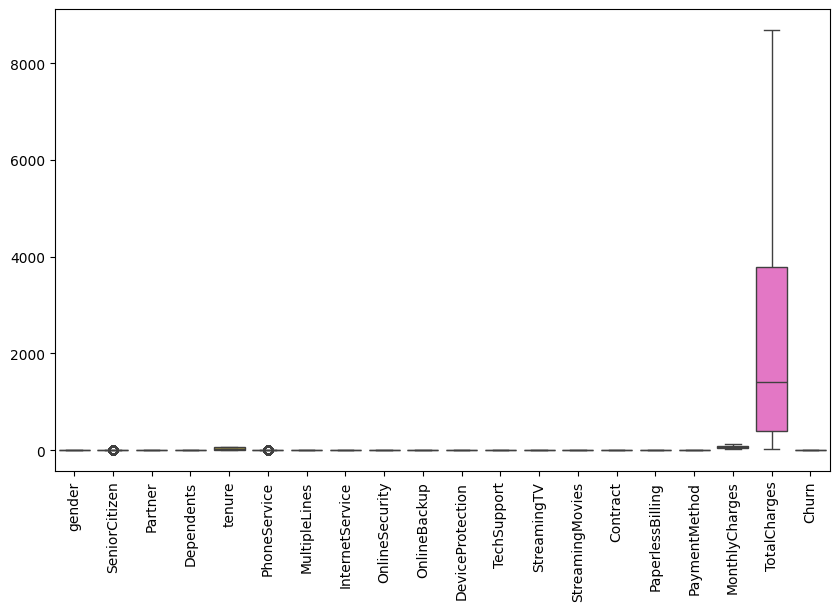

In [259]:
plt.subplots(figsize=(10,6))
sns.boxplot(data= df)
plt.xticks(rotation= 90)

**Correlection Between Columns**

In [260]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


**Display Correlation Using Heatmap**

<Axes: >

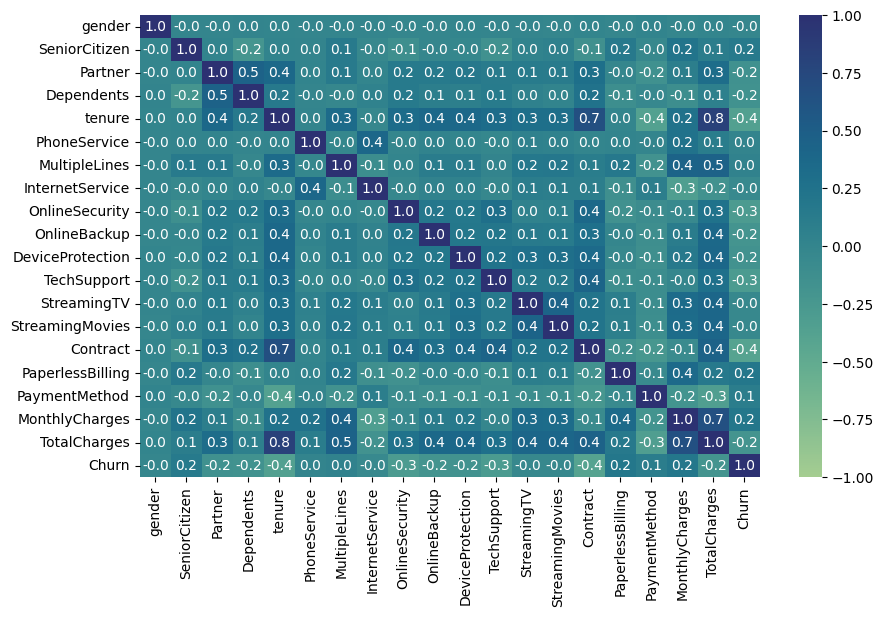

In [261]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),
          annot= True,
          fmt= '0.1f',
          vmin= -1,
          vmax= 1,
          cmap= 'crest')

**Defining train And Test data**

In [262]:
x= df.drop('Churn',axis=1)
y= df['Churn']

**Visualizing The Imbalance Within The Target Value**

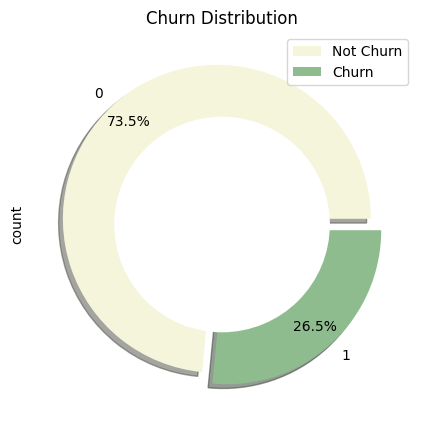

In [263]:
plt.subplots(figsize=(9,5))
df['Churn'].value_counts().plot.pie(autopct= '%1.1f%%',pctdistance=0.85,explode=[0.05,0.05],shadow= True,colors= ['#F5F5DC','#8FBC8F'])
center_circle= plt.Circle((0,0),0.70,fc='white')
fig= plt.gcf()
fig.gca().add_artist(center_circle)
plt.legend(['Not Churn','Churn'],loc= 'upper right')
plt.title('Churn Distribution')
plt.show()

**Fixing Imbalance Using Oversampling**

In [264]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X,Y = sampler.fit_resample(x,y)
print('Resampled Test Set Shape:',Counter(Y))

Resampled Test Set Shape: Counter({0: 5174, 1: 5174})


**Splitting Training And Testing Data**

In [265]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

**Feature Scaling**

In [266]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [267]:
ann=tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(6,activation='relu'))

ann.add(tf.keras.layers.Dense(4,activation='relu'))

ann.add(tf.keras.layers.Dense(1,activation='sigmoid'))

ann.compile(optimizer= 'adam',loss= 'binary_crossentropy',metrics= ['accuracy'])

ann.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
227/227 [==============================] - 1s 3ms/step - loss: 0.5943 - accuracy: 0.6898
Epoch 2/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4812 - accuracy: 0.7739
Epoch 3/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4511 - accuracy: 0.7895
Epoch 4/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4401 - accuracy: 0.7924
Epoch 5/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4333 - accuracy: 0.7999
Epoch 6/100
227/227 [==============================] - 1s 2ms/step - loss: 0.4290 - accuracy: 0.8009
Epoch 7/100
227/227 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8020
Epoch 8/100
227/227 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8031
Epoch 9/100
227/227 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8048
Epoch 10/100
227/227 [==============================] - 0s 2ms/step - loss: 0.4192 - accura